# Problem Set 08

# Task 1 - Reading

Please, read through the material on alterating gradient syncrotrons. [Material - Cern](https://ab-abp-rlc.web.cern.ch/AP-literature/Courant-Snyder-1958.pdf)

## Task 2 - Get current version of JuliAccel.jl

We made a few changes and updated the verios of JuliAccel.jl we are using for the lecture. 

### Task 2.1

Therefore, you have to refetch or download the latest version. 

#### Option 1: Update git folder using git

If you have used git to clone the repository you can update the verion simply by fetching the new version using:

```
git fetch orign/main
```
#### Option 2: Redownload the git folder

If you have not used git you have to redownload the git folder and overwrite the old version. [ETHZ-gitlab/JuliAccel.jl](https://www.gitlab.ethz.ch/heinekas/juliaccel.jl)

### Task 2.2 - Build package

Then rebuild the package. the simpliest is from the command line running the following commands: (Make sure you put in the correct directory) 

```
> julia 

julia> ]
pkg> activate /home/data/PAM/juliaccel.jl ## depends on your path
pkg> instantiate 

```


In [1]:
import Pkg

In [2]:
# TODO: use the correct path for your system

Pkg.activate("../juliaccel.jl/")

  Activating project at `/home/data/ETH/HS24/PAM/juliaccel.jl`


In [3]:
### A basic setup


print("Importing packages... ")


using JuliAccel

using Plots
using ProgressBars

using Dates

println("Done!")


# =======================================================================

# VARIABLES

# Initial coordinates
ξi = [1.0, 0.0, 0.0, 0.0, 0.0, 0.0]


# Dragt-Finn factorise?
symp = true


# Beamline data files
# TODO make sure they are downloaded and in the same folder as the notbook!
mad  = "pam-08sol.mad"
prob = "pam-08sol.japd"



# PROBLEM DEFINITION

print("Defining problem... ")

# Compute maps
Ms  = JuliAccel.gen_maps(mad, prob, symplectic=true)

println("Done!")




Importing packages... Done!
Defining problem... 

0.0%┣                                              ┫ 0/100 [00:00<00:-1, -0s/it]
1.0%┣▍                                         ┫ 1/100 [00:09<Inf:Inf, InfGs/it]
2.0%┣█                                             ┫ 2/100 [00:14<23:14, 14s/it]
3.0%┣█▍                                            ┫ 3/100 [00:20<15:59, 10s/it]
4.0%┣█▉                                             ┫ 4/100 [00:27<14:26, 9s/it]
5.0%┣██▍                                            ┫ 5/100 [00:33<12:57, 8s/it]
6.0%┣██▉                                            ┫ 6/100 [00:38<11:54, 8s/it]
7.0%┣███▎                                           ┫ 7/100 [00:44<11:16, 7s/it]
8.0%┣███▊                                           ┫ 8/100 [00:49<10:45, 7s/it]
9.0%┣████▎                                          ┫ 9/100 [00:54<10:20, 7s/it]
10.0%┣████▌                                        ┫ 10/100 [01:00<09:58, 7s/it]
11.0%┣█████                                        ┫ 11/100 [01:05<09:40, 7s/it]
12.0%┣█████▍                

Done!


100.0%┣███████████████████████████████████████████┫ 100/100 [09:10<00:00, 6s/it]
100.0%┣███████████████████████████████████████████┫ 100/100 [09:10<00:00, 6s/it]


In [4]:
mad_parsed = JuliAccel.parse_madx(mad)

prob_set = JuliAccel.extract_model_data(prob)


ModelData("x px y py z δ", Dict{String, Integer}("order" => 9, "trunc_order" => 3, "exp_order" => 4), Dict{String, Any}[Dict("args" => [""], "expr" => "δ/β0-sqrt((1/β0+δ)^2-px^2-py^2-1/(β0*γ0)^2)", "type" => "drift"), Dict("args" => ["k1"], "expr" => "δ/β0-sqrt((1/β0+δ)^2-px^2-py^2-1/(β0*γ0)^2)+(k1/2)*(x^2-y^2)", "type" => "quadrupole")])

## Task 3 - First steps with JuliAccel.jl

The familiarise yourselfs with JuliAccel.jl, we will look at how elments are added in JuliAccel.jl, how to use them and how a simple accelerator lattice is constructed.  


Note: make sure you placed the pam-07.japd and pam-07.mad files in the same folder as this notebook.

In [15]:
## some setup

fieldnames(typeof(prob_set))

(:variables, :truncation_orders, :hamiltonians)

### Task 3.1 - Drift

The first task is to read the Hamiltonian of the drift element. It is already available you only need to use Julia to output the expression. 

Todos:
- [ ] Print the drift Hamiltonian
- [ ] generate the transfer matrix

In [25]:
### TODO print Hamiltonian
##  it is placed in the `prob_set` element

Meta.parse(prob_set.hamiltonians[1]["expr"])


:(δ / β0 - sqrt((((1 / β0 + δ) ^ 2 - px ^ 2) - py ^ 2) - 1 / (β0 * γ0) ^ 2))

In [26]:
### TODO generate the transfer matrix
##  you can use the maps in `Ms` and the function TaylorSeries.jacobian(...) 

TaylorSeries.jacobian(Ms[1])

6×6 transpose(::Matrix{Float64}) with eltype Float64:
 1.0  1.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  1.0  0.0  0.0
 0.0  0.0  0.0  1.0  0.0  0.0
 0.0  0.0  0.0  0.0  1.0  2.6112e-7
 0.0  0.0  0.0  0.0  0.0  1.0

### Task 3.2 - Quadropole

Now we extend the program by a Quadropole element.

Todos:

- [ ] add the hamiltonion to the pam-08.japd mimicing the drift element
- [ ] repeat the tasks from 2.1 for the quadropole

In [27]:
### TODO: the first part in not in the notebook.

### in this case the files were exchanged with the pam-08sol.japd and pam-08sol.mad

In [28]:
### TODO: print Hamiltonion and transfer matrix

Meta.parse(prob_set.hamiltonians[2]["expr"])


:((δ / β0 - sqrt((((1 / β0 + δ) ^ 2 - px ^ 2) - py ^ 2) - 1 / (β0 * γ0) ^ 2)) + (k1 / 2) * (x ^ 2 - y ^ 2))

In [5]:
TaylorSeries.jacobian(Ms[2])

6×6 transpose(::Matrix{Float64}) with eltype Float64:
  0.937894  0.191534  0.0       0.0      0.0  0.0
 -0.628232  0.937894  0.0       0.0      0.0  0.0
  0.0       0.0       1.06928   0.20904  0.0  0.0
  0.0       0.0       0.685651  1.06928  0.0  0.0
  0.0       0.0       0.0       0.0      1.0  5.2224e-8
  0.0       0.0       0.0       0.0      0.0  1.0

### Task 3.3 - Simple lattice 

- [ ] Create a small cell with drift space and a quadropole
- [ ] Make them repeat 50 times
- [ ] evolve a bunch through this lattice

In [29]:
### TODO the first two are again not in the notebook.

In [30]:
### TODO evolve the initial coordinates through the created lattice

# solution from here 
N = length(Ms)

ξs = Matrix{Float64}(undef, 6, length(Ms))
ξs[:, 1] = copy(ξi)



for n in ProgressBar(1:N-1)

    ξt_s = Ms[n](ξs[:, n])
    ξs[:, n+1] = copy(ξt_s)

    
end



0.0%┣                                               ┫ 0/99 [00:00<00:00, -0s/it]
100.0%┣█████████████████████████████████████████┫ 99/99 [00:00<00:00, 11.3kit/s]
100.0%┣█████████████████████████████████████████┫ 99/99 [00:00<00:00, 10.9kit/s]


### Task 3.4 - Symplecticity

- [ ] generate the transfer maps without Symplecticity
- [ ] compare the maps and outputs 

In [31]:
### TODO create a `Mns` similar to `Ms`, but without the symplecticity option

Mns  = JuliAccel.gen_maps(mad, prob, symplectic=false)

0.0%┣                                              ┫ 0/100 [00:00<00:00, -0s/it]
1.0%┣▍                                         ┫ 1/100 [00:00<Inf:Inf, InfGs/it]
2.0%┣█                                              ┫ 2/100 [00:00<00:43, 2it/s]
3.0%┣█▍                                             ┫ 3/100 [00:01<00:31, 3it/s]
4.0%┣█▉                                             ┫ 4/100 [00:01<00:27, 4it/s]
5.0%┣██▍                                            ┫ 5/100 [00:01<00:24, 4it/s]
6.0%┣██▉                                            ┫ 6/100 [00:01<00:23, 4it/s]
7.0%┣███▎                                           ┫ 7/100 [00:01<00:22, 4it/s]
8.0%┣███▊                                           ┫ 8/100 [00:02<00:22, 4it/s]
9.0%┣████▎                                          ┫ 9/100 [00:02<00:21, 4it/s]
10.0%┣████▌                                        ┫ 10/100 [00:02<00:20, 4it/s]
11.0%┣█████                                        ┫ 11/100 [00:02<00:20, 4it/s]
12.0%┣█████▍                

100-element Vector{Vector{TaylorN{Float64}}}:
 [ 1.0 x + 1.0 px - 1.0000001305599893 px δ + 𝒪(‖x‖¹⁰),  1.0 px + 𝒪(‖x‖¹⁰),  1.0 y + 1.0 py - 1.0000001305599893 py δ + 𝒪(‖x‖¹⁰),  1.0 py + 𝒪(‖x‖¹⁰),  1.0 z + 2.611199956259469e-7 δ - 0.5000000652799946 px² - 0.5000000652799946 py² - 3.9168004457665614e-7 δ² + 𝒪(‖x‖¹⁰),  1.0 δ + 𝒪(‖x‖¹⁰)]
 [ 0.9351172266666666 x + 0.19562666666666667 px + 0.06416555504411976 x δ - 0.19125335830336648 px δ + 0.0007172268539488906 x δ² - 0.004373334475298114 px δ² + 𝒪(‖x‖¹⁰),  - 0.6416554666666667 x + 0.9351172266666666 px - 0.014344535206155452 x δ + 0.06416555504411976 px δ + 0.0007172268539488906 px δ² + 𝒪(‖x‖¹⁰),  1.0663172266666667 y + 0.20437333333333335 py - 0.06703446208535084 y δ - 0.20874669392062922 py δ + 0.0007172268539488906 y δ² + 0.004373334475298114 py δ² + 𝒪(‖x‖¹⁰),  0.6703445333333333 y + 1.0663172266666667 py - 0.014344535206155452 y δ - 0.06703446208535084 py δ + 0.0007172268539488906 py δ² + 𝒪(‖x‖¹⁰),  1.0 z + 5.222399912518938e-8 δ - 0.

In [32]:
### TODO compare `Mns` and `Ms` using the linear maps or bunch evolution 


# solution from here 
N = length(Mns)

ξns = Matrix{Float64}(undef, 6, length(Mns))
ξns[:, 1] = copy(ξi)



for n in ProgressBar(1:N-1)

    ξt_s = Mns[n](ξns[:, n])
    ξns[:, n+1] = copy(ξt_s)

    
end


0.0%┣                                               ┫ 0/99 [00:00<00:00, -0s/it]
100.0%┣█████████████████████████████████████████┫ 99/99 [00:00<00:00, 10.8kit/s]
100.0%┣█████████████████████████████████████████┫ 99/99 [00:00<00:00, 10.6kit/s]


In [33]:
using LaTeXStrings

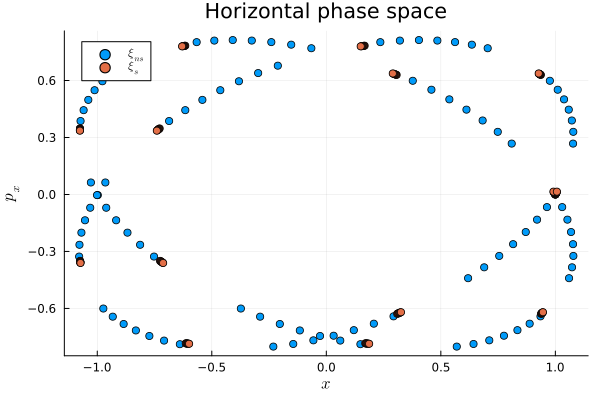

In [35]:
x_i = ξns[1,:]
px_i = ξns[2,:]

x_f = ξs[1,:]
px_f = ξs[2,:]

plot(x_i, px_i, seriestype=:scatter, label=L"\xi_{ns}")
plot!(x_f, px_f, seriestype=:scatter, label=L"\xi_s")
xaxis!(L"x")
yaxis!(L"p_x")
title!("Horizontal phase space")

In [36]:
Ms_small = Ms[10:20]

11-element Vector{Vector{TaylorN{Float64}}}:
 [ 0.9378940610189533 x + 0.19153399638311924 px + 0.0633749369586413 x δ - 0.19147718178336187 px δ - 0.0006809370122152493 x δ² - 0.00013905897548074133 px δ² - 1.5337318650204814e-5 x δ³ + 4.6339242170310075e-5 px δ³ + 8.239651539124459e-8 x δ⁴ + 1.682677664445659e-8 px δ⁴ + 𝒪(‖x‖¹⁰),  - 0.6282315081366312 x + 0.9378940610189533 px - 0.013012049875296725 x δ + 0.06222533461550689 px δ + 0.0004561134395768316 x δ² - 0.0006809370122152493 px δ² + 3.1490359565962767e-6 x δ³ - 1.505910429128275e-5 px δ³ - 5.519182739381762e-8 x δ⁴ + 8.239651539124459e-8 px δ⁴ + 𝒪(‖x‖¹⁰),  1.0692823212884013 y + 0.20903987640160815 py - 0.0682311557957937 y δ - 0.2090650490008421 py δ - 0.0007824522503475823 y δ² - 0.00015296588978085536 py δ² + 1.6642820557719924e-5 y δ³ + 5.099476998199169e-5 py δ³ + 9.542717139727643e-8 y δ⁴ + 1.8655582082574526e-8 py δ⁴ + 𝒪(‖x‖¹⁰),  0.6856507945972746 y + 1.0692823212884013 py - 0.01546990139558425 y δ - 0.0688509228352331